In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [28]:
#base_dir = os.path.dirname(__file__)
base_dir = 'D:\\UNI\\IIIT_Muen\\adapted_PactchCore\\PatchCore_anomaly_detection'
result_dir = os.path.join(base_dir, "results")
csv_dir = os.path.join(result_dir, "csv")
plot_dir = os.path.join(result_dir, "plots")

# make dirs
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

batch_1 = pd.read_csv(os.path.join(csv_dir, 'deault.csv'))[1:-1]
batch_2 = pd.read_csv(os.path.join(csv_dir, 'default_kernel_4_.csv'))[1:-1]
batch_4 = pd.read_csv(os.path.join(csv_dir, 'default_kernel_5_.csv'))[1:-1]
#batch_8 = pd.read_csv(os.path.join(csv_dir, 'default_kernel_6_.csv'))[1:-1]
batch_8 = pd.read_csv(os.path.join(csv_dir, 'default_kernel_4_padding_0.csv'))[1:-1]
batch_16 = pd.read_csv(os.path.join(csv_dir,'default_stride_2_.csv'))[1:-1]
batch_32 = pd.read_csv(os.path.join(csv_dir,'default_stride_2_padding_0_.csv'))[1:-1]
# batch_64 = pd.read_csv(os.path.join(csv_dir,'batch_64.csv'))[:-1]
# batch_128 = pd.read_csv(os.path.join(csv_dir,'batch_128.csv'))[:-1]

all_files = [batch_1, batch_2, batch_4, batch_8, batch_16, batch_32]#, batch_64, batch_128]

feature_extraction_cpu = []
embedding_cpu = []
total_cpu = []
search_memory = []
anomaly_map = []
whole_process = []
total_cuda = []
# prep_memory_bank = []
for file in all_files:
    feature_extraction_cpu += [file['#1 feature extraction cpu'].mean()]
    embedding_cpu += [file['#3 embedding of features cpu'].mean()]
    search_memory += [file['#5 search with memory bank cpu'].mean()]
    total_cpu += [file['#9 sum cpu'].mean()]
    anomaly_map += [file['#7 anomaly map cpu'].mean()]
    whole_process += [file['#11 whole process cpu'].mean()]
    # prep_memory_bank += [file['#13 preparation memory bank'].mean()]
    total_cuda += [file['#12 whole process gpu'].mean()]

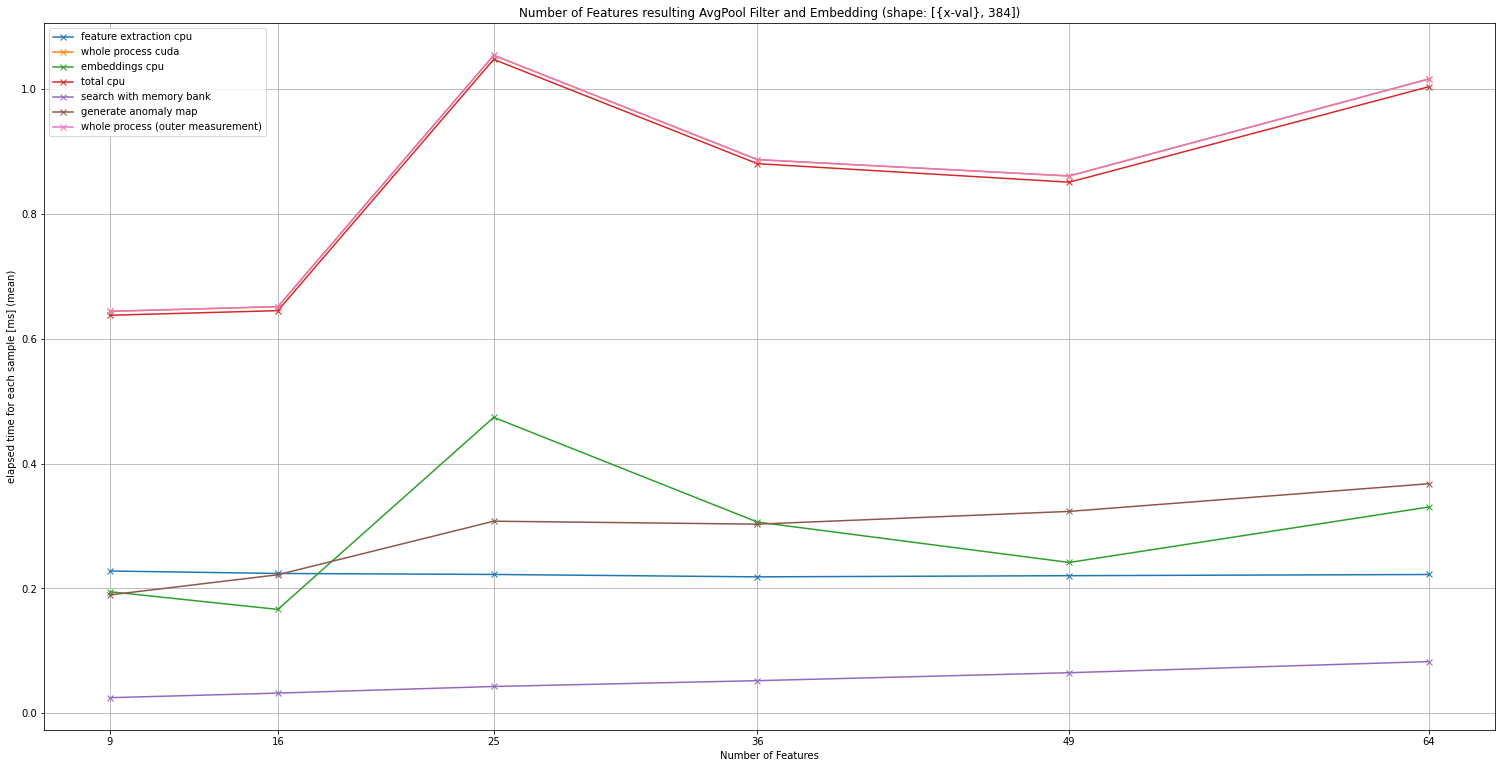

In [29]:
fig = plt.figure(figsize=(26,13))

ax = fig.add_subplot()

# line, = ax1.plot([1, 2, 4, 8, 16, 32, 64, 128], feature_extraction_cpu)
# line, = ax2.plot([1, 2, 4, 8, 16, 32, 64, 128], embedding_cpu)
x_vals = [64, 49, 36, 25, 16, 9]#, 4]#, 3]#, 8, 16, 32, 64, 128]
plt.plot(x_vals,feature_extraction_cpu, label = "feature extraction cpu", marker = 'x')
plt.plot(x_vals,total_cuda, label = "whole process cuda", marker = 'x')
plt.plot(x_vals,embedding_cpu, label = "embeddings cpu", marker = 'x')
plt.plot(x_vals,total_cpu, label = "total cpu", marker = 'x')
plt.plot(x_vals,search_memory, label = "search with memory bank", marker = 'x')
plt.plot(x_vals,anomaly_map, label = "generate anomaly map", marker = 'x')
plt.plot(x_vals,whole_process, label = "whole process (outer measurement)", marker = 'x')
# plt.plot(x_vals,prep_memory_bank, label = "prep memory bank")

# ax.set_xscale('log', base=2)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# fig.set_label = 'Batch Size'
# plt.set_label = 'Batch Size'
plt.xticks(x_vals,['64','49','36','25','16','9'])
plt.title('Number of Features resulting AvgPool Filter and Embedding (shape: [{x-val}, 384])')
plt.xlabel('Number of Features')
plt.ylabel('elapsed time for each sample [ms] (mean)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(plot_dir, 'latences_features_2.svg'), bbox_inches = 'tight')
plt.show()

In [17]:
b1 = pd.read_csv(os.path.join(csv_dir, 'default_kernel_6_.csv'))
b2 = pd.read_csv(os.path.join(csv_dir, 'default_kernel_4_padding_0.csv'))

In [23]:
b1[1:-1]

,Unnamed: 0,#1 feature extraction cpu,#2 feature extraction gpu,#3 embedding of features cpu,#4 embedding of features gpu,#5 search with memory bank cpu,#6 search with memory bank gpu,#7 anomaly map cpu,#8 anomaly map gpu,#9 sum cpu,...,#13 preparation memory bank,batch_size,input_size,coreset_sampling_ratio,n_neighbors,patch_size,resulting_features_spatial,resulting_features_depth,img_auc,pixel_auc
1,1,0.236229,0.290775,0.407235,0.353927,0.046013,0.045555,0.317160,0.317888,1.006638,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
2,2,0.214194,0.289002,0.403896,0.330208,0.041598,0.041193,0.293469,0.294148,0.953157,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
3,3,0.213576,0.319620,0.448637,0.343726,0.041693,0.041271,0.286119,0.286773,0.990025,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
4,4,0.213604,0.351272,0.482928,0.346417,0.041704,0.041272,0.289231,0.289858,1.027467,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
5,5,0.216644,0.373370,0.510619,0.355026,0.041780,0.041299,0.286608,0.287289,1.055651,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
6,6,0.216828,0.378219,0.512245,0.351995,0.041836,0.041455,0.288728,0.289352,1.059638,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
7,7,0.215324,0.386867,0.529157,0.358778,0.041685,0.041266,0.289722,0.290321,1.075889,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
8,8,0.215123,0.387483,0.528978,0.357731,0.041748,0.041305,0.290119,0.290795,1.075968,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
9,9,0.230099,0.337399,0.486061,0.381130,0.044311,0.042769,0.315779,0.316720,1.076251,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
10,10,0.215982,0.306745,0.424518,0.334871,0.041857,0.041449,0.293176,0.293844,0.975533,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734


In [20]:
b2

,Unnamed: 0,#1 feature extraction cpu,#2 feature extraction gpu,#3 embedding of features cpu,#4 embedding of features gpu,#5 search with memory bank cpu,#6 search with memory bank gpu,#7 anomaly map cpu,#8 anomaly map gpu,#9 sum cpu,...,#13 preparation memory bank,batch_size,input_size,coreset_sampling_ratio,n_neighbors,patch_size,resulting_features_spatial,resulting_features_depth,img_auc,pixel_auc
0,0,0.422309,0.629610,0.803137,0.598346,0.084211,0.083323,0.563478,0.564796,1.873135,...,4.11622,14,64,0.01,9,"AvgPool2d(kernel_size=4, stride=1, padding=0)",25,384,0.887069,0.798506
1,1,0.269825,0.364666,0.485108,0.392036,0.051041,0.050233,0.397650,0.398799,1.203624,...,4.11622,14,64,0.01,9,"AvgPool2d(kernel_size=4, stride=1, padding=0)",25,384,0.887069,0.798506
2,2,0.218543,0.281190,0.395692,0.334266,0.041988,0.041571,0.303711,0.304396,0.959934,...,4.11622,14,64,0.01,9,"AvgPool2d(kernel_size=4, stride=1, padding=0)",25,384,0.887069,0.798506
3,3,0.219694,0.313974,0.429969,0.336819,0.042265,0.041839,0.295024,0.295701,0.986952,...,4.11622,14,64,0.01,9,"AvgPool2d(kernel_size=4, stride=1, padding=0)",25,384,0.887069,0.798506
4,4,0.215898,0.342362,0.465197,0.339819,0.041706,0.041313,0.293697,0.294361,1.016497,...,4.11622,14,64,0.01,9,"AvgPool2d(kernel_size=4, stride=1, padding=0)",25,384,0.887069,0.798506
5,5,0.216374,0.361307,0.490030,0.346222,0.042096,0.041668,0.291616,0.292319,1.040116,...,4.11622,14,64,0.01,9,"AvgPool2d(kernel_size=4, stride=1, padding=0)",25,384,0.887069,0.798506
6,6,0.218007,0.386870,0.525500,0.357833,0.042285,0.041803,0.298035,0.298753,1.083827,...,4.11622,14,64,0.01,9,"AvgPool2d(kernel_size=4, stride=1, padding=0)",25,384,0.887069,0.798506
7,7,0.215537,0.384312,0.517498,0.349889,0.043621,0.043165,0.296169,0.296824,1.072826,...,4.11622,14,64,0.01,9,"AvgPool2d(kernel_size=4, stride=1, padding=0)",25,384,0.887069,0.798506
8,8,0.220927,0.324685,0.446668,0.344160,0.042502,0.041999,0.307755,0.308511,1.017852,...,4.11622,14,64,0.01,9,"AvgPool2d(kernel_size=4, stride=1, padding=0)",25,384,0.887069,0.798506
9,9,0.220346,0.342786,0.475389,0.354088,0.042267,0.041849,0.300073,0.300717,1.038074,...,4.11622,14,64,0.01,9,"AvgPool2d(kernel_size=4, stride=1, padding=0)",25,384,0.887069,0.798506


In [9]:
batch_8

,Unnamed: 0,#1 feature extraction cpu,#2 feature extraction gpu,#3 embedding of features cpu,#4 embedding of features gpu,#5 search with memory bank cpu,#6 search with memory bank gpu,#7 anomaly map cpu,#8 anomaly map gpu,#9 sum cpu,...,#13 preparation memory bank,batch_size,input_size,coreset_sampling_ratio,n_neighbors,patch_size,resulting_features_spatial,resulting_features_depth,img_auc,pixel_auc
0,0,0.385517,0.730030,0.896579,0.554397,0.073750,0.072888,0.509446,0.510641,1.865293,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
1,1,0.236229,0.290775,0.407235,0.353927,0.046013,0.045555,0.317160,0.317888,1.006638,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
2,2,0.214194,0.289002,0.403896,0.330208,0.041598,0.041193,0.293469,0.294148,0.953157,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
3,3,0.213576,0.319620,0.448637,0.343726,0.041693,0.041271,0.286119,0.286773,0.990025,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
4,4,0.213604,0.351272,0.482928,0.346417,0.041704,0.041272,0.289231,0.289858,1.027467,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
5,5,0.216644,0.373370,0.510619,0.355026,0.041780,0.041299,0.286608,0.287289,1.055651,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
6,6,0.216828,0.378219,0.512245,0.351995,0.041836,0.041455,0.288728,0.289352,1.059638,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
7,7,0.215324,0.386867,0.529157,0.358778,0.041685,0.041266,0.289722,0.290321,1.075889,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
8,8,0.215123,0.387483,0.528978,0.357731,0.041748,0.041305,0.290119,0.290795,1.075968,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
9,9,0.230099,0.337399,0.486061,0.381130,0.044311,0.042769,0.315779,0.316720,1.076251,...,3.57824,14,64,0.01,9,"AvgPool2d(kernel_size=6, stride=1, padding=1)",25,384,0.850383,0.795734
